In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("bank-full.csv")

In [4]:
df.head(5)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [5]:
df = pd.read_csv("bank-full.csv", delimiter=';')

In [6]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
#convert categorical variables into dummy/indicator variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [10]:

# Separating features and target variable
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,False,False,False,True,False,False,False,True,False
45209,57,668,17,508,4,-1,0,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [13]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [14]:
# Initializing the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [15]:
# Training the classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Running Predictions
y_pred = dt_classifier.predict(X_test)

In [17]:
# Evaluating the model accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8705075749198274
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.46      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Confusion Matrix:
[[7344  608]
 [ 563  528]]


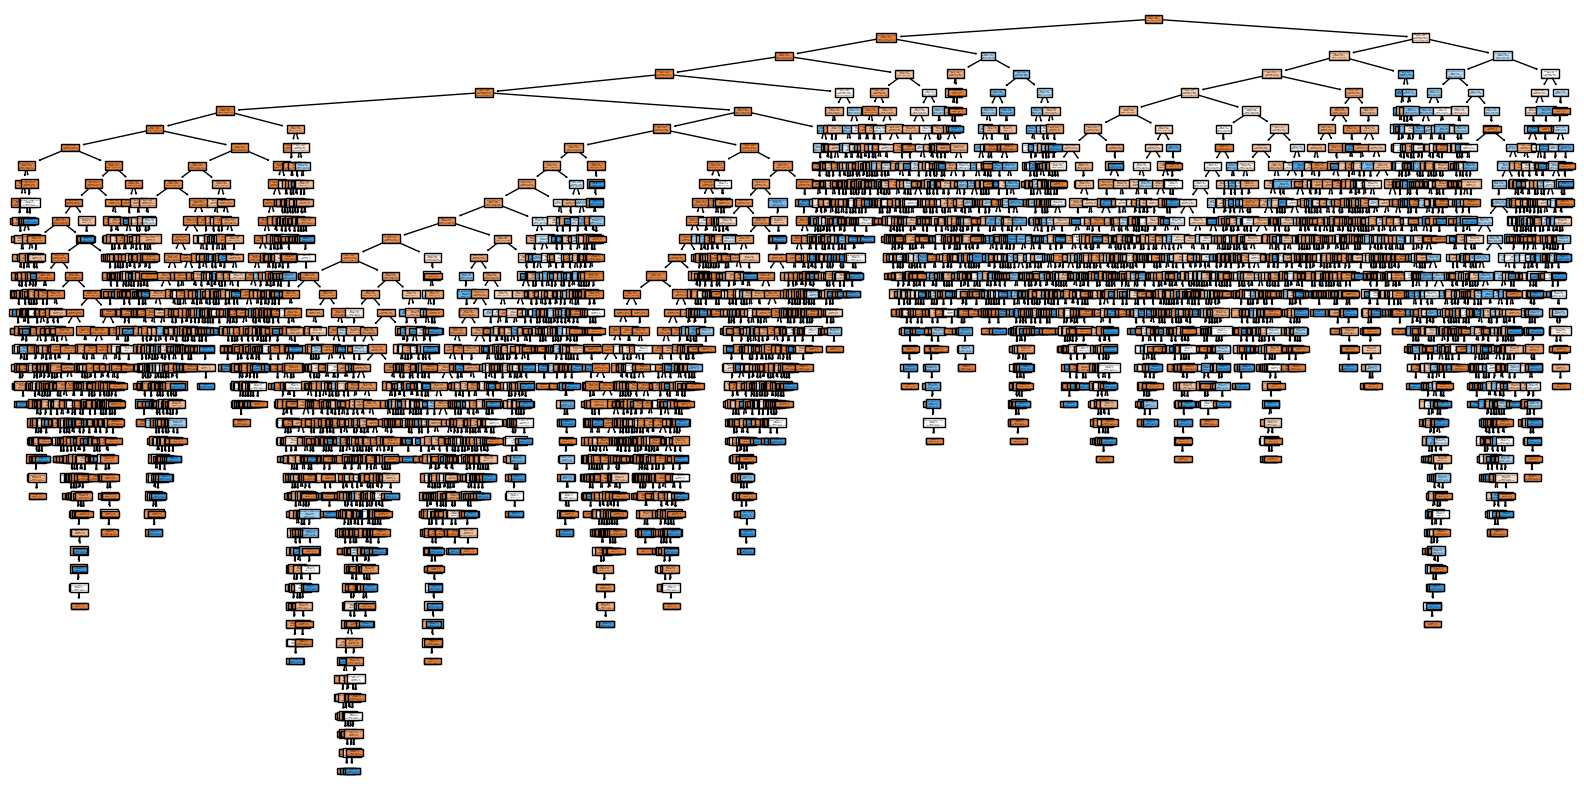

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Subscribed', 'Subscribed'], filled=True)
plt.show()


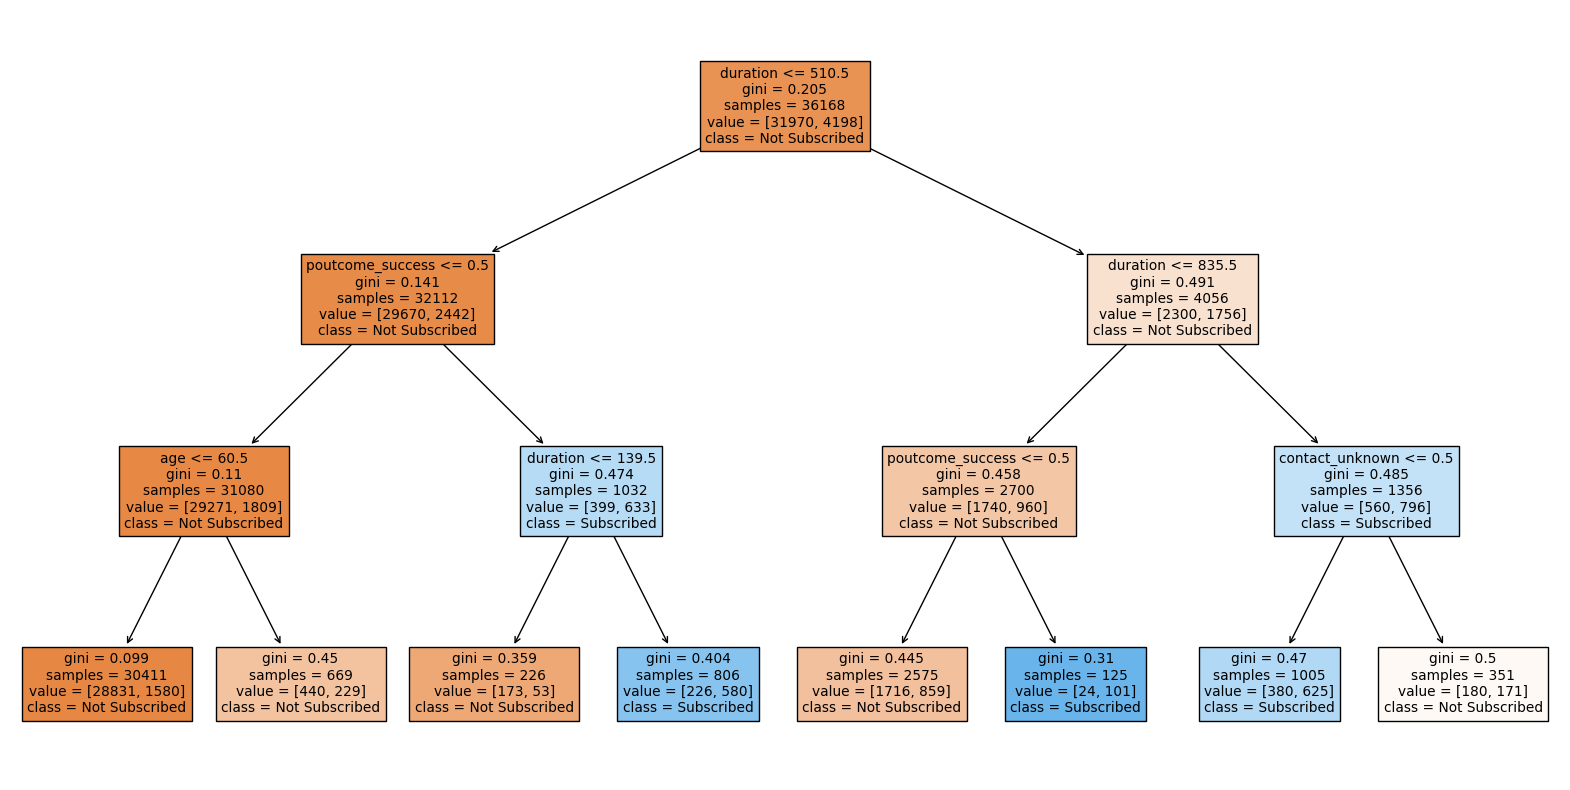

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Train a simpler tree
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Subscribed', 'Subscribed'], filled=True)
plt.show()


In [20]:
# There seems to be an oversampling case where the model performs well in predicting "not subscribed" (class 0) but poorly in predicting "subscribed" (class 1).

In [18]:
# Adjusting Class Weights to help mitigate this issue and improve the model's ability to generalize.
dt_classifier = DecisionTreeClassifier(class_weight='balanced')
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced')

In [19]:
# Evaluating the model accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8705075749198274
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.46      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Confusion Matrix:
[[7344  608]
 [ 563  528]]


# Bagging

In [21]:
# import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [20]:
# Storing the decision tree classsifier as the base estimator
base_estimator = DecisionTreeClassifier()

In [22]:
# create a bagging classifier with the base estimator

bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

In [23]:
# Training the bagging classifier
bagging_clf.fit(X_train, y_train)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [24]:
# Predicting test set

y_pred = bagging_clf.predict(X_test)

In [25]:
# Checking accuracy
accuracy = accuracy_score(y_pred, y_test)

print(f'Accuracy: {accuracy}')


Accuracy: 0.9033506579674887


In [26]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.63      0.47      0.54      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.72      0.74      9043
weighted avg       0.89      0.90      0.90      9043

Confusion Matrix:
[[7656  296]
 [ 578  513]]
